<a href="https://colab.research.google.com/github/ramsoi53/ramsoi/blob/main/Europework_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ship_survey = pd.read_csv('ship_survey_master.csv', encoding='ISO-8859-1')
audit_survey = pd.read_csv('audit_survey_master.csv', encoding='ISO-8859-1')
mater_survey = pd.read_csv('mater_survey_master.csv', encoding='ISO-8859-1')

In [ ]:
# Rename the 'ï»¿Year' column to 'Year' in ship_survey and mater_survey
ship_survey.rename(columns={'ï»¿Year': 'Year'}, inplace=True)
mater_survey.rename(columns={'ï»¿Year': 'Year'}, inplace=True)

# Filter data for location 'par'
ship_survey_par = ship_survey[ship_survey['Location'] == 'par']
audit_survey_par = audit_survey[audit_survey['Location'] == 'par']
mater_survey_par = mater_survey[mater_survey['Location'] == 'par']

# Get counts of each Survey_type by Year
ship_survey_par_counts = ship_survey_par.groupby(['Year', 'Survey_type']).size().unstack(fill_value=0)
audit_survey_par_counts = audit_survey_par.groupby(['Year', 'Survey_type']).size().unstack(fill_value=0)
mater_survey_par_counts = mater_survey_par.groupby(['Year', 'Survey_type']).size().unstack(fill_value=0)

# Combine all counts into a single dataframe
par_counts = pd.DataFrame({
    'ship_survey_s': ship_survey_par_counts.get('s', pd.Series(index=ship_survey_par_counts.index, dtype=int)),
    'audit_survey_a': audit_survey_par_counts.get('a', pd.Series(index=audit_survey_par_counts.index, dtype=int)),
    'mater_survey_m': mater_survey_par_counts.get('m', pd.Series(index=mater_survey_par_counts.index, dtype=int))
}).fillna(0).astype(int)

par_counts



,ship_survey_s,audit_survey_a,mater_survey_m
Year,,,
2020.0,1,0,0
2021.0,28,10,67
2022.0,22,13,82
2023.0,13,10,160


In [ ]:
# Get counts of each Survey_type by Year for all locations
ship_survey_counts = ship_survey.groupby(['Year', 'Survey_type']).size().unstack(fill_value=0)
audit_survey_counts = audit_survey.groupby(['Year', 'Survey_type']).size().unstack(fill_value=0)
mater_survey_counts = mater_survey.groupby(['Year', 'Survey_type']).size().unstack(fill_value=0)

# Combine all counts into a single dataframe for all locations
all_locations_counts = pd.DataFrame({
    'ship_survey_s': ship_survey_counts.get('s', pd.Series(index=ship_survey_counts.index, dtype=int)),
    'audit_survey_a': audit_survey_counts.get('a', pd.Series(index=audit_survey_counts.index, dtype=int)),
    'mater_survey_m': mater_survey_counts.get('m', pd.Series(index=mater_survey_counts.index, dtype=int))
}).fillna(0).astype(int)

all_locations_counts


,ship_survey_s,audit_survey_a,mater_survey_m
Year,,,
2020.0,19,0,0
2021.0,1161,353,1671
2022.0,1333,392,2821
2023.0,1369,399,2729


In [ ]:
#전 유럽 qa 비중

# Group the data by Year, Location, and QA value, then count the occurrences
mater_survey_qa_counts = mater_survey.groupby(['Year', 'Location', 'qa']).size().unstack(fill_value=0)

# Calculate the total surveys per year and location
total_surveys_per_year_location = mater_survey.groupby(['Year', 'Location']).size()

# Calculate the proportion of QA=1 surveys per year and location
proportion_qa_1_per_year_location = (mater_survey_qa_counts[1.0] / total_surveys_per_year_location).fillna(0)


proportion_qa_1_per_year_location


Year    Location
2021.0  atn         0.000000
        cph         0.324100
        hmb         0.427361
        ist         0.000000
        ldn         0.277778
        mad         0.000000
        mil         0.728972
        par         0.000000
        rtd         0.031250
2022.0  atn         0.000000
        cph         0.208835
        hmb         0.370038
        ist         0.000000
        ldn         0.333333
        mad         0.000000
        mil         0.600629
        par         0.000000
        rtd         0.056818
2023.0  atn         0.000000
        cph         0.263427
        hmb         0.467961
        ist         0.000000
        ldn         0.316456
        mad         0.000000
        mil         0.740741
        par         0.112500
        rtd         0.114286
dtype: float64

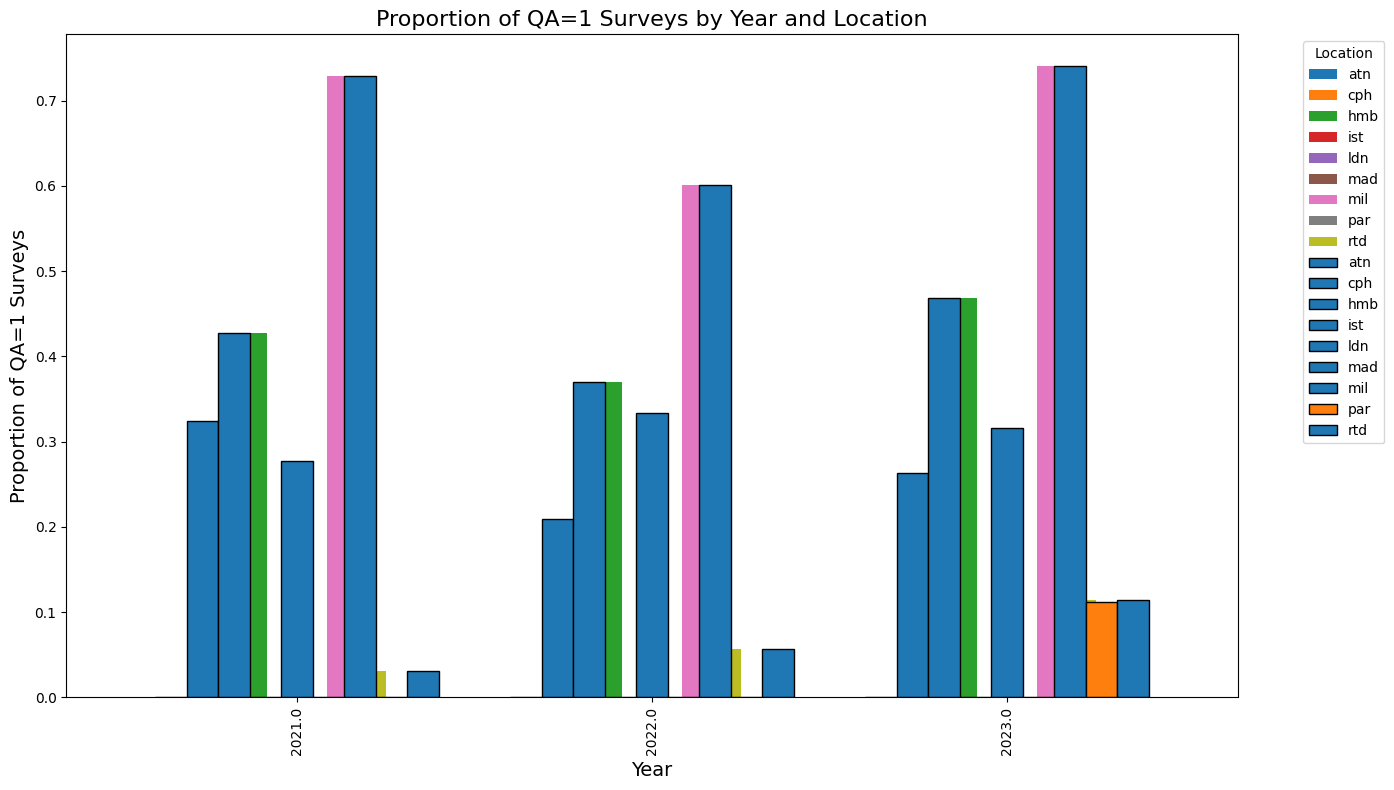

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
proportion_qa_1_df = proportion_qa_1_per_year_location.unstack().fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot for each year
proportion_qa_1_df.plot(kind='bar', ax=ax)

# Highlight 'par' in a different color
colors = ['#1f77b4' if loc != 'par' else '#ff7f0e' for loc in proportion_qa_1_df.columns]
proportion_qa_1_df.plot(kind='bar', ax=ax, color=colors, width=0.8, edgecolor='black')

# Adding labels and title
ax.set_title('Proportion of QA=1 Surveys by Year and Location', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Proportion of QA=1 Surveys', fontsize=14)
ax.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
!pip install adjustText

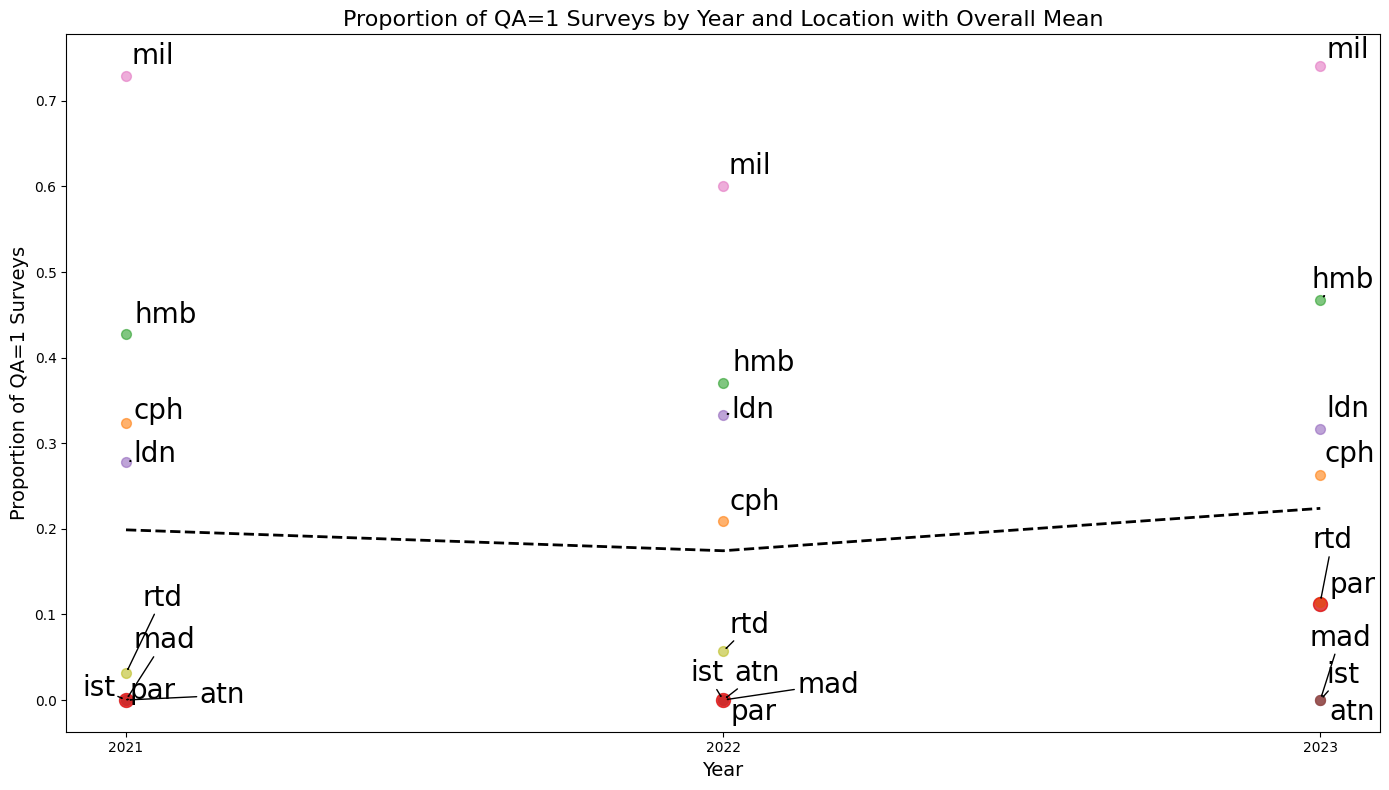

In [ ]:
years = proportion_qa_1_df.index
locations = proportion_qa_1_df.columns
mean_proportion = proportion_qa_1_df.mean(axis=1)

# Plotting with labels for each point
fig, ax = plt.subplots(figsize=(14, 8))

import adjustText as aT # 추가된 부분

# Scatter plot for each location and year
import adjustText as aT
import numpy as np

# Scatter plot for each location and year
texts = []
for location in locations:
    proportions = proportion_qa_1_df[location]
    ax.scatter(years, proportions, label=location if location != 'par' else 'par (highlighted)', s=100 if location == 'par' else 50, alpha=0.6)
    # Annotate each point with the location name
    texts.extend([ax.annotate(location, (year, proportion), fontsize=20) for year, proportion in zip(years, proportions)])

# Highlighting 'par' with a distinct color
ax.scatter(years, proportion_qa_1_df['par'], color='red', s=100, label='par (highlighted)', alpha=0.6)

# Plotting the mean proportion line
ax.plot(years, mean_proportion, color='black', linestyle='--', linewidth=2, label='Overall Mean')

# Adding labels and title
ax.set_title('Proportion of QA=1 Surveys by Year and Location with Overall Mean', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Proportion of QA=1 Surveys', fontsize=14)

# Set x-axis ticks to show every year
ax.set_xticks(np.arange(min(years), max(years)+1, 1))

# Adjust text to avoid overlapping
aT.adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
# Filter the dataset for Survey_type 'm'
mater_survey_type_m = mater_survey[mater_survey['Survey_type'] == 'm']

# Calculate the total number of surveys for each location to find the top 5 locations
top_5_locations = mater_survey_type_m.groupby('Location').size().nlargest(5)

top_5_locations



Location
hmb    3933
cph    1250
mil     883
mad     355
par     309
dtype: int64

In [ ]:
# Filter the data to include only the top 5 locations
mater_survey_type_m_top_5 = mater_survey_type_m[mater_survey_type_m['Location'].isin(top_5_locations.index)]

# Group by Year, Location, and Surveyor, then count the number of surveys for each Surveyor
surveyor_workload_yearly_top_5 = mater_survey_type_m_top_5.groupby(['Year', 'Location', 'Surveyor']).size()

# Calculate the mean workload per Surveyor for each Location and Year
average_workload_per_surveyor_yearly_top_5 = surveyor_workload_yearly_top_5.groupby(['Year', 'Location']).mean().unstack(fill_value=0)


# Get the names of the unique Surveyors for the top 5 locations by year
unique_surveyors_top_5 = mater_survey_type_m_top_5.groupby(['Year', 'Location', 'Surveyor']).size().unstack(fill_value=0)

unique_surveyors_top_5


Surveyor         ahntaekyu  byunjungkeaun  chohyunchul  choijongyuel  \
Year   Location                                                        
2021.0 cph               0              0            0           361   
       hmb               0              0            0             0   
       mad              69              0            0             0   
       mil               0              0            0             0   
       par               0              0            0             0   
2022.0 cph               0              0           56           442   
       hmb               0              2            0             0   
       mad             133              0            0             0   
       mil               0              0            0             0   
       par               0              0            0             0   
2023.0 cph               0             26          365             0   
       hmb               0            125            0             0   
       mad              93              0            0             0   
       mil               0              0            0             0   
       par               0              0            0             0   

Surveyor         dokwansoo  duroandre  ivanenkoandrey  jinjungkwang  \
Year   Location                                                       
2021.0 cph               0          0               0             0   
       hmb               0          0             265             0   
       mad               0          5               0             0   
       mil               0          0               0             0   
       par               0          0               0             0   
2022.0 cph               0          0               0             0   
       hmb               0          0             405             0   
       mad               0         26               0             0   
       mil               0          0               0             1   
       par               0          0               0             0   
2023.0 cph               0          0               0             0   
       hmb               0          0             336             0   
       mad              26          0               0             0   
       mil               0          0               0             0   
       par               0          0               0             0   

Surveyor         josungchul  kimjinho  ...  krzysztofpatalong  leejik  \
Year   Location                        ...                              
2021.0 cph                0         0  ...                  0       0   
       hmb                0         0  ...                  0      53   
       mad                0         0  ...                  0       0   
       mil                0         0  ...                  0       0   
       par                0         0  ...                  0       0   
2022.0 cph                0         0  ...                  0       0   
       hmb                2         0  ...                192      92   
       mad                0         0  ...                  0       0   
       mil                0         1  ...                  0       0   
       par                0         0  ...                  0       0   
2023.0 cph                0         0  ...                  0       0   
       hmb              194         0  ...                  0     358   
       mad                0         0  ...                  0       0   
       mil                0       306  ...                  0       0   
       par                0         0  ...                  0       0   

Surveyor         luismiguelpimentadecastro  moonkyunghak  nielsenphilip  \
Year   Location                                                           
2021.0 cph                               0             0              0   
       hmb                               0             0            150   
       mad               

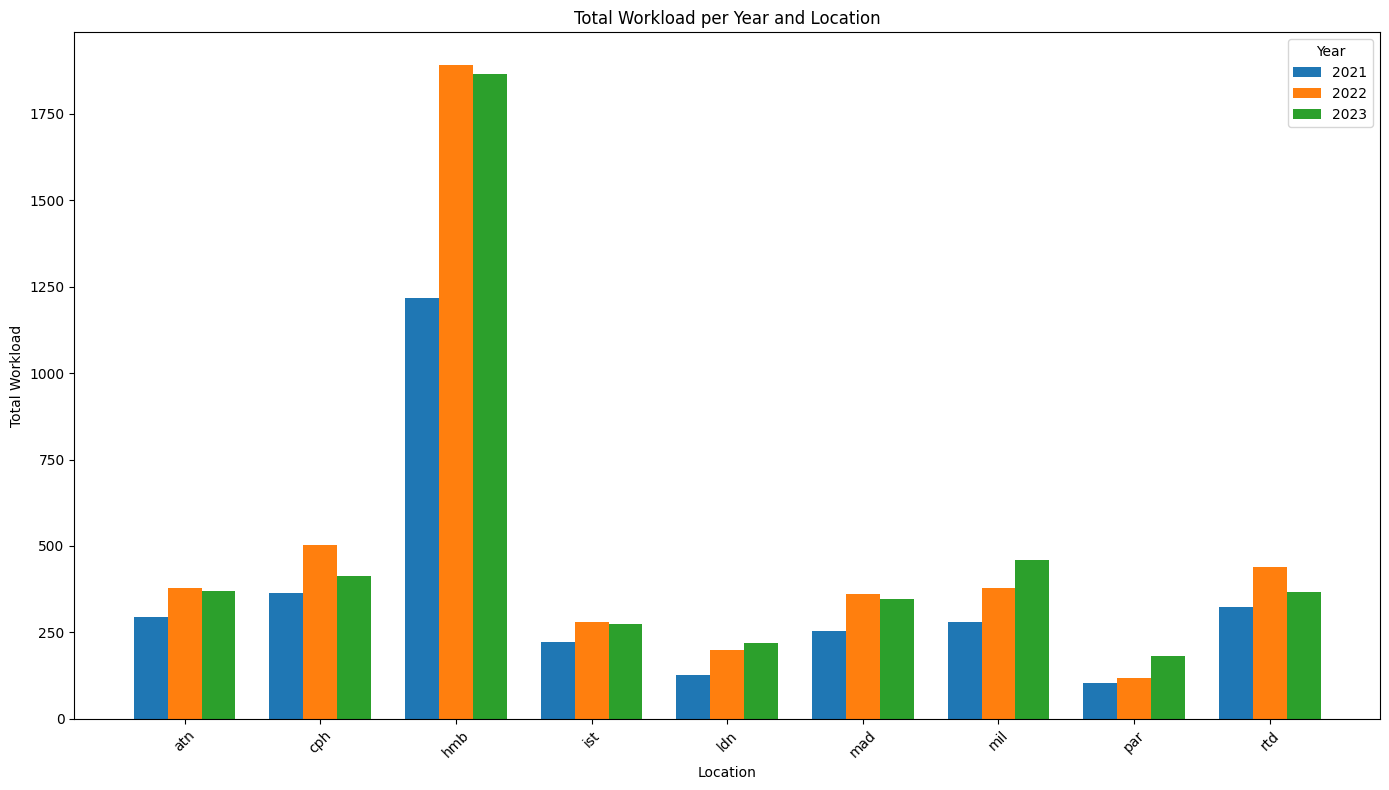

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'Year' column is correctly parsed if it's not already
mater_survey['Year'] = pd.to_datetime(mater_survey['Issue_date'], format='%Y%m%d', errors='coerce').dt.year
ship_survey['Year'] = ship_survey['Year'].astype(str).str.extract('(\d{4})')[0].astype(float).astype('Int64')
audit_survey['Year'] = audit_survey['Year'].astype(str).str.extract('(\d{4})')[0].astype(float).astype('Int64')

# Remove data for the year 2020
mater_survey = mater_survey[mater_survey['Year'] != 2020]
ship_survey = ship_survey[ship_survey['Year'] != 2020]
audit_survey = audit_survey[audit_survey['Year'] != 2020]

# Group by Year and Location to calculate total workloads for each dataset
total_workload_per_year_location_mater = mater_survey.groupby(['Year', 'Location']).size().unstack(fill_value=0)
total_workload_per_year_location_ship = ship_survey.groupby(['Year', 'Location']).size().unstack(fill_value=0)
total_workload_per_year_location_audit = audit_survey.groupby(['Year', 'Location']).size().unstack(fill_value=0)

# Combine the datasets
total_workload_per_year_location = total_workload_per_year_location_mater.add(total_workload_per_year_location_ship, fill_value=0).add(total_workload_per_year_location_audit, fill_value=0)

# Plot total workload per year and location
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.25

# Get the years and locations
years = total_workload_per_year_location.index
locations = total_workload_per_year_location.columns

# Set bar positions
bar_positions = np.arange(len(locations))

# Plot bars for each year
for i, year in enumerate(years):
    bar_offset = bar_width * i
    ax.bar(bar_positions + bar_offset, total_workload_per_year_location.loc[year], width=bar_width, label=int(year))


# Customize the plot
ax.set_title('Total Workload per Year and Location')
ax.set_xlabel('Location')
ax.set_ylabel('Total Workload')
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(locations, rotation=45)
ax.legend(title='Year')

plt.tight_layout()
plt.show()



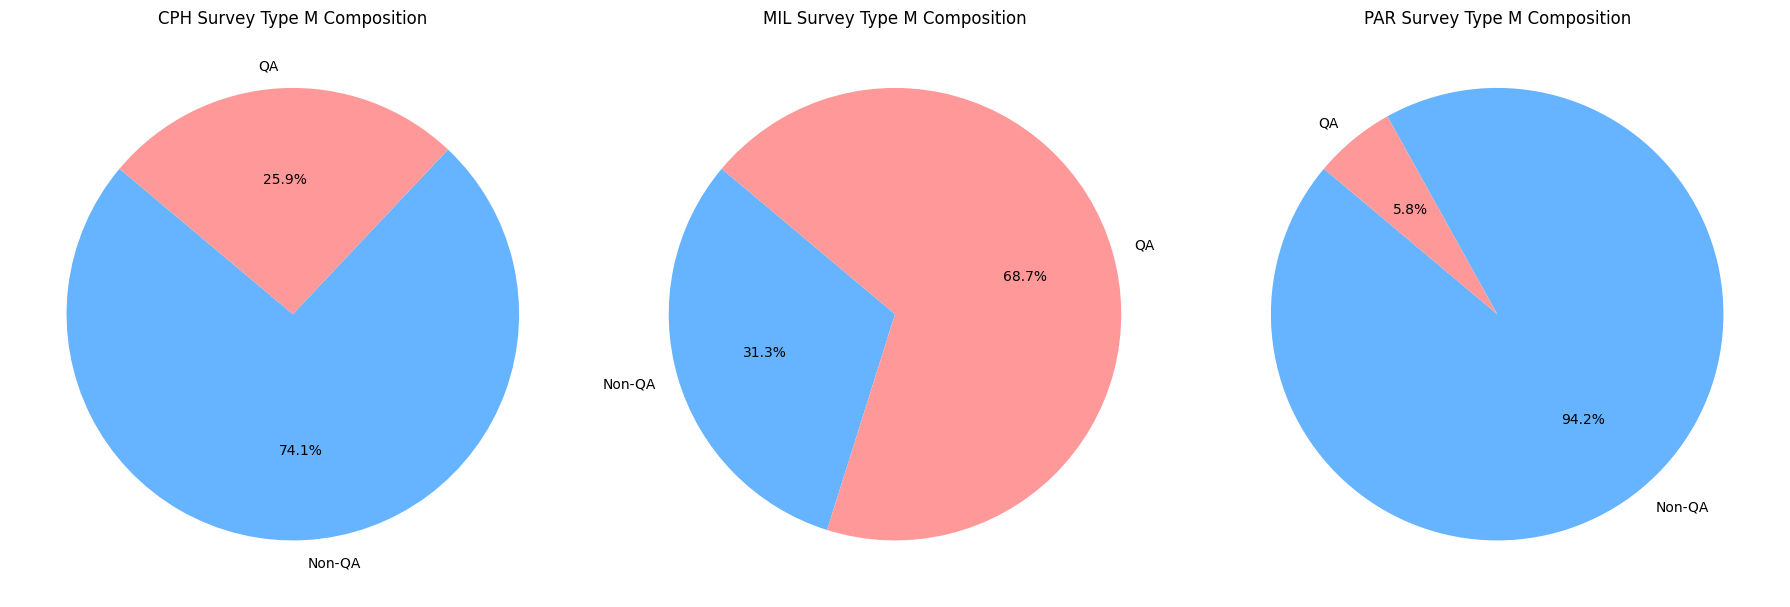

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


import pandas as pd
import matplotlib.pyplot as plt

# Load the data
mater_survey = pd.read_csv('mater_survey_master.csv', encoding='ISO-8859-1')

# Ensure 'Year' column is correctly parsed if it's not already
mater_survey['Year'] = pd.to_datetime(mater_survey['Issue_date'], format='%Y%m%d', errors='coerce').dt.year

# Filter data for survey type 'm' and specified locations
locations = ['cph', 'mil', 'par']
filtered_data = mater_survey[(mater_survey['Survey_type'] == 'm') & (mater_survey['Location'].isin(locations))]

# Group by Location and QA value
grouped_data = filtered_data.groupby(['Location', 'qa']).size().unstack(fill_value=0)

# Define a function to format the labels
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return "{:.1f}%\n({:d} surveys)".format(pct, absolute)

# Plot pie charts for each location
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, location in enumerate(locations):
    axes[i].pie(grouped_data.loc[location], labels=['Non-QA', 'QA'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
    axes[i].set_title(f'{location.upper()} Survey Type M Composition')

plt.tight_layout()
plt.show()



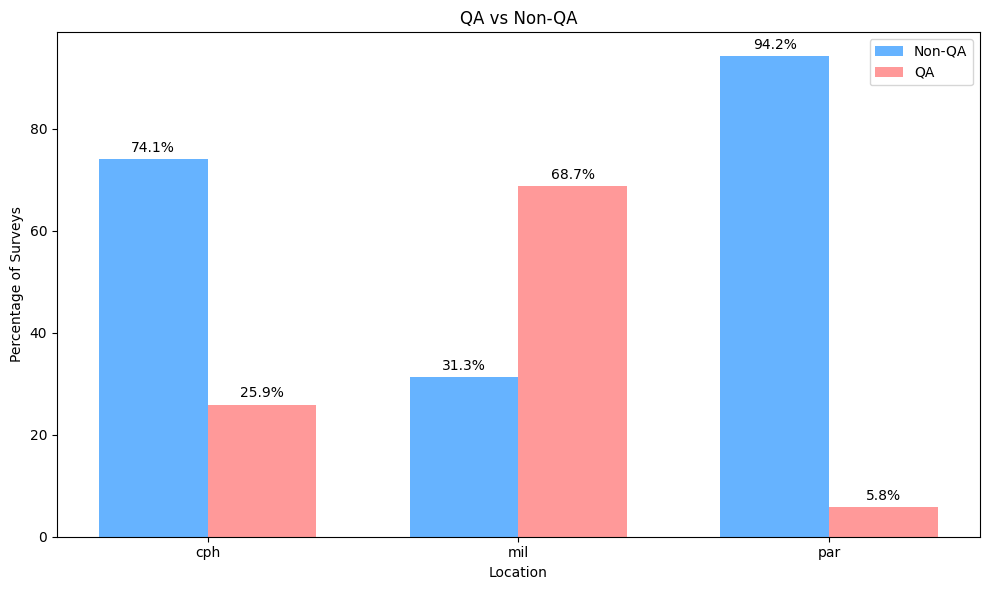

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
mater_survey = pd.read_csv('mater_survey_master.csv', encoding='ISO-8859-1')

# Ensure 'Year' column is correctly parsed if it's not already
mater_survey['Year'] = pd.to_datetime(mater_survey['Issue_date'], format='%Y%m%d', errors='coerce').dt.year

# Filter data for survey type 'm' and specified locations
locations = ['cph', 'mil', 'par']
filtered_data = mater_survey[(mater_survey['Survey_type'] == 'm') & (mater_survey['Location'].isin(locations))]

# Group by Location and QA value
grouped_data = filtered_data.groupby(['Location', 'qa']).size().unstack(fill_value=0)
grouped_data.columns = ['Non-QA', 'QA']  # Rename columns for better readability

# Calculate percentages
grouped_data_percent = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(locations))

# Plot bars
bars1 = ax.bar(index, grouped_data_percent['Non-QA'], bar_width, label='Non-QA', color='#66b3ff')
bars2 = ax.bar(index + bar_width, grouped_data_percent['QA'], bar_width, label='QA', color='#ff9999')

# Add labels, title and legend
ax.set_xlabel('Location')
ax.set_ylabel('Percentage of Surveys')
ax.set_title('QA vs Non-QA')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(locations)
ax.legend()

# Add percentage labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the data
mater_survey = pd.read_csv('mater_survey_master.csv', encoding='ISO-8859-1')

# Ensure 'Year' column is correctly parsed if it's not already
mater_survey['Year'] = pd.to_datetime(mater_survey['Issue_date'], format='%Y%m%d', errors='coerce').dt.year

# Filter data for survey type 'm' and specified locations
locations = ['cph', 'mil', 'par']
filtered_data = mater_survey[(mater_survey['Survey_type'] == 'm') & (mater_survey['Location'].isin(locations))]

# Group by Year, Location, and Surveyor to count the number of surveys
surveyor_workload = filtered_data.groupby(['Year', 'Location', 'Surveyor']).size().unstack(fill_value=0)

# Calculate the mean workload per Surveyor for each Year and Location
average_workload_per_surveyor = surveyor_workload.groupby(['Year', 'Location']).mean().unstack(fill_value=0)

# Display the results
print("Average Workload per Surveyor by Year and Location:")
print(average_workload_per_surveyor)

print("\nSurveyor Workload Details:")
print(surveyor_workload)

# Save the results to CSV files for easier viewing
average_workload_per_surveyor.to_csv('average_workload_per_surveyor.csv')
surveyor_workload.to_csv('surveyor_workload_details.csv')


Average Workload per Surveyor by Year and Location:
Surveyor byunjungkeaun           chohyunchul           choijongyuel            \
Location           cph  mil  par         cph  mil  par          cph  mil  par   
Year                                                                            
2021.0             0.0  0.0  0.0         0.0  0.0  0.0        361.0  0.0  0.0   
2022.0             0.0  0.0  0.0        56.0  0.0  0.0        442.0  0.0  0.0   
2023.0            26.0  0.0  0.0       365.0  0.0  0.0          0.0  0.0  0.0   

Surveyor jinjungkwang  ...      kimjinho             kimkyongmin              \
Location          cph  ...  par      cph    mil  par         cph  mil    par   
Year                   ...                                                     
2021.0            0.0  ...  0.0      0.0    0.0  0.0         0.0  0.0   67.0   
2022.0            0.0  ...  0.0      0.0    1.0  0.0         0.0  0.0   82.0   
2023.0            0.0  ...  0.0      0.0  306.0  0.0         

In [ ]:
import pandas as pd

# Load the data
mater_survey = pd.read_csv('mater_survey_master.csv', encoding='ISO-8859-1')

# Ensure 'Year' column is correctly parsed if it's not already
mater_survey['Year'] = pd.to_datetime(mater_survey['Issue_date'], format='%Y%m%d', errors='coerce').dt.year

# Filter data for survey type 'm', qa=0, and specified locations
locations = ['cph', 'mil', 'par']
filtered_data = mater_survey[(mater_survey['Survey_type'] == 'm') & (mater_survey['qa'] == 0) & (mater_survey['Location'].isin(locations))]

# Group by Year, Location, and Surveyor to count the number of surveys
surveyor_workload = filtered_data.groupby(['Year', 'Location', 'Surveyor']).size().unstack(fill_value=0)

# Calculate the mean workload per Surveyor for each Year and Location
average_workload_per_surveyor = surveyor_workload.groupby(['Year', 'Location']).mean().unstack(fill_value=0)

# Display the results
print("Average Workload per Surveyor (QA=0) by Year and Location:")
print(average_workload_per_surveyor)

print("\nSurveyor Workload Details (QA=0):")
print(surveyor_workload)

# Save the results to CSV files for easier viewing
average_workload_per_surveyor.to_csv('average_workload_per_surveyor_qa_0.csv')
surveyor_workload.to_csv('surveyor_workload_details_qa_0.csv')


Average Workload per Surveyor (QA=0) by Year and Location:
Surveyor byunjungkeaun           chohyunchul           choijongyuel            \
Location           cph  mil  par         cph  mil  par          cph  mil  par   
Year                                                                            
2021.0             0.0  0.0  0.0         0.0  0.0  0.0        244.0  0.0  0.0   
2022.0             0.0  0.0  0.0        41.0  0.0  0.0        353.0  0.0  0.0   
2023.0            26.0  0.0  0.0       262.0  0.0  0.0          0.0  0.0  0.0   

Surveyor jinjungkwang  ...      kimjinho            kimkyongmin              \
Location          cph  ...  par      cph   mil  par         cph  mil    par   
Year                   ...                                                    
2021.0            0.0  ...  0.0      0.0   0.0  0.0         0.0  0.0   67.0   
2022.0            0.0  ...  0.0      0.0   1.0  0.0         0.0  0.0   82.0   
2023.0            0.0  ...  0.0      0.0  76.0  0.0        

In [ ]:
import pandas as pd

# Load the data
mater_survey = pd.read_csv('mater_survey_master.csv', encoding='ISO-8859-1')
ship_survey = pd.read_csv('ship_survey_master.csv', encoding='ISO-8859-1')
audit_survey = pd.read_csv('audit_survey_master.csv', encoding='ISO-8859-1')

# Filter data for locations 'mil' and 'par'
locations = ['mil', 'par']

# Filter for specified locations in each dataset
mater_survey_filtered = mater_survey[mater_survey['Location'].isin(locations)]
ship_survey_filtered = ship_survey[ship_survey['Location'].isin(locations)]
audit_survey_filtered = audit_survey[audit_survey['Location'].isin(locations)]

# Combine the filtered datasets
combined_survey_filtered = pd.concat([mater_survey_filtered, ship_survey_filtered, audit_survey_filtered])

# Group by Location, Survey_type, and City to get the counts
city_workload = combined_survey_filtered.groupby(['Location', 'Survey_type', 'City']).size().unstack(fill_value=0)

# Display the results
print("City Workload for Locations MIL and PAR by Survey Type:")
print(city_workload)

# Save the results to a CSV file for easier viewing
city_workload.to_csv('city_workload_mil_par.csv')


City Workload for Locations MIL and PAR by Survey Type:
City                  Illkirch_graffenstaden  Saint_Chamond   acqui_terme  \
Location Survey_type                                                        
mil      m                                 0               0            2   
         s                                 0               0            0   
par      m                                29               1            0   
         s                                 0               0            0   

City                  amsterdam  andelfingen  andwil  antwerpen  armentieres  \
Location Survey_type                                                           
mil      m                    0           16       1          0            0   
         s                    2            0       0          0            0   
par      m                    0            0       0          0           12   
         s                    0            0       0          3            0   



In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import folium

# 데이터 로드
data = pd.read_csv('Geodata_with_Location_Workload.csv', encoding='ISO-8859-1')

# PAR 사무소 데이터만 필터링
par_data = data[['city', 'lati', 'longti', 'par']]
par_data = par_data.dropna(subset=['par'])

# Ensure latitude and longitude are floats
par_data['lati'] = par_data['lati'].astype(float)
par_data['longti'] = par_data['longti'].astype(float)

# 프랑스 지도 범위 설정
fr_coords = [46.5, 2.5]  # 프랑스 중심 좌표
map = folium.Map(location=fr_coords, zoom_start=6, tiles='OpenStreetMap')

# 각 도시의 업무량에 따라 마커 크기 크게 조정
for row in par_data.itertuples(index=False):
    city, lat, lon, workload = row
    radius = workload * 1000  # 업무량에 비례하여 마커 크기 크게 조정 (예: 1000배)
    folium.Circle(
        location=[lat, lon],
        radius=radius,
        popup=f"{city}: {int(workload)}",  # 업무량을 정수로 표시
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.5
    ).add_to(map)

    # 업무량이 5건 이상인 경우에만 숫자 표시, 가시성이 좋은 색상과 볼드체 적용
    if workload > 5:
        folium.Marker(
            location=[lat, lon],  # Original location, without offset
            icon=folium.DivIcon(
                icon_size=(150, 36),
                icon_anchor=(0, 0),
                html=f'<div style="font-size: 16pt; color: black; font-weight: bold;">{int(workload)}</div>',
            )
        ).add_to(map)

# 지도 저장
map.save('france_par_office_workload.html')


In [ ]:
# PARIS 지도
import pandas as pd
import folium
from geopy.distance import geodesic

# 데이터 로드
data = pd.read_csv('Geodata_with_Location_Workload.csv', encoding='ISO-8859-1')

# PAR 사무소 데이터만 필터링
par_data = data[['city', 'lati', 'longti', 'par']]
par_data = par_data.dropna(subset=['par'])

# Ensure latitude and longitude are floats
par_data['lati'] = par_data['lati'].astype(float)
par_data['longti'] = par_data['longti'].astype(float)

# Paris coordinates
paris_coords = (48.8566, 2.3522)

# 프랑스 지도 범위 설정
map = folium.Map(location=[46.5, 2.5], zoom_start=6, tiles='OpenStreetMap')

# 각 도시의 업무량에 따라 마커 크기 크게 조정
for row in par_data.itertuples(index=False):
    city, lat, lon, workload = row
    radius = workload * 1000  # 업무량에 비례하여 마커 크기 크게 조정 (예: 1000배)
    city_coords = (lat, lon)
    distance = geodesic(paris_coords, city_coords).kilometers

    folium.Circle(
        location=city_coords,
        radius=radius,
        popup=f"{city}: {int(workload)}",  # 업무량을 정수로 표시
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.5
    ).add_to(map)

    # 업무량이 5건 이상인 경우에만 숫자 표시, 가시성이 좋은 색상과 볼드체 적용
    if workload > 5:
        label_html = f'<div style="font-size: 12pt; color: black; font-weight: bold;">{int(workload)}</div>'
        if workload >= 11:
            label_html += f'<div style="font-size: 12pt; color: blue; font-weight: bold;">{round(distance, 2)} km</div>'

        folium.Marker(
            location=city_coords,  # Original location, without offset
            icon=folium.DivIcon(
                icon_size=(150, 36),
                icon_anchor=(0, 0),
                html=label_html,
            )
        ).add_to(map)

# 지도 저장
map.save('france_par_office_workload_distance.html')


In [ ]:
import pandas as pd
import folium

# 데이터 로드
data = pd.read_csv('Geodata_with_Location_Workload.csv', encoding='ISO-8859-1')

# MIL 사무소 데이터만 필터링
mil_data = data[['city', 'lati', 'longti', 'mil']]
mil_data = mil_data.dropna(subset=['mil'])

# Ensure latitude and longitude are floats
mil_data['lati'] = mil_data['lati'].astype(float)
mil_data['longti'] = mil_data['longti'].astype(float)

# Milan coordinates
milan_coords = (45.4642, 9.1900)

# 이태리 지도 범위 설정
map = folium.Map(location=[42.5, 12.5], zoom_start=6, tiles='OpenStreetMap')

# 각 도시의 업무량에 따라 마커 크기 크게 조정
for row in mil_data.itertuples(index=False):
    city, lat, lon, workload = row
    radius = workload * 1000  # 업무량에 비례하여 마커 크기 크게 조정 (예: 1000배)
    city_coords = (lat, lon)

    folium.Circle(
        location=city_coords,
        radius=radius,
        popup=f"{city}: {int(workload)}",  # 업무량을 정수로 표시
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.5
    ).add_to(map)

    # 업무량이 5건 이상인 경우에만 숫자 표시, 가시성이 좋은 색상과 볼드체 적용
    if workload > 5:
        label_html = f'<div style="font-size: 12pt; color: black; font-weight: bold;">{int(workload)}</div>'

        folium.Marker(
            location=city_coords,  # Original location, without offset
            icon=folium.DivIcon(
                icon_size=(150, 36),
                icon_anchor=(0, 0),
                html=label_html,
            )
        ).add_to(map)

# 지도 저장
map.save('italy_mil_office_workload.html')


In [ ]:
import pandas as pd
import folium

# 데이터 로드
data = pd.read_csv('Geodata_with_Location_Workload.csv', encoding='ISO-8859-1')

# CPH 사무소 데이터만 필터링
cph_data = data[['city', 'lati', 'longti', 'cph']]
cph_data = cph_data.dropna(subset=['cph'])

# Ensure latitude and longitude are floats
cph_data['lati'] = cph_data['lati'].astype(float)
cph_data['longti'] = cph_data['longti'].astype(float)

# Copenhagen coordinates
copenhagen_coords = (55.6761, 12.5683)

# 덴마크 지도 범위 설정
map = folium.Map(location=[56.0, 10.0], zoom_start=6, tiles='OpenStreetMap')

# 각 도시의 업무량에 따라 마커 크기 크게 조정
for row in cph_data.itertuples(index=False):
    city, lat, lon, workload = row
    radius = workload * 1000  # 업무량에 비례하여 마커 크기 크게 조정 (예: 1000배)
    city_coords = (lat, lon)

    folium.Circle(
        location=city_coords,
        radius=radius,
        popup=f"{city}: {int(workload)}",  # 업무량을 정수로 표시
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.5
    ).add_to(map)

    # 업무량이 5건 이상인 경우에만 숫자 표시, 가시성이 좋은 색상과 볼드체 적용
    if workload > 5:
        label_html = f'<div style="font-size: 12pt; color: black; font-weight: bold;">{int(workload)}</div>'

        folium.Marker(
            location=city_coords,  # Original location, without offset
            icon=folium.DivIcon(
                icon_size=(150, 36),
                icon_anchor=(0, 0),
                html=label_html,
            )
        ).add_to(map)

# 지도 저장
map.save('denmark_cph_office_workload.html')


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('mater_survey_master.csv', encoding='ISO-8859-1')

# Clean the column names
data.columns = data.columns.str.strip().str.replace('ï»¿', '')

# Display the cleaned column names to ensure correctness
print(data.columns)

# Filter data for the specified locations and survey_type 'm'
filtered_data = data[(data['Survey_type'] == 'm') & (data['Location'].isin(['mil', 'par', 'cph']))]

# Group by Year, Location, and Surveyor, then calculate total workload per surveyor per year
yearly_workload = filtered_data.groupby(['Year', 'Location', 'Surveyor']).size().reset_index(name='workload')

# Find the surveyor with the highest workload for each year and location
top_surveyors_per_year = yearly_workload.loc[yearly_workload.groupby(['Year', 'Location'])['workload'].idxmax()]

# Pivot the table to get a clearer view, filling missing values with 0
summary_table = top_surveyors_per_year.pivot_table(index='Year', columns='Location', values='workload', aggfunc='sum').fillna(0)

# Display the summary table
print(summary_table)

# Optionally, save the summary table to a CSV file
summary_table.to_csv('yearly_workload_top_surveyors.csv')





Index(['Year', 'Location', 'App_no', 'Survey_type', 'Cert_no', 'Surveyor',
       'Issue_date', 'qa', 'Customer', 'Maker', 'Address', 'City', 'Country'],
      dtype='object')
Location  cph  mil  par
Year                   
2021.0    361  214   67
2022.0    442  316   82
2023.0    365  306  160


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('mater_survey_master.csv', encoding='ISO-8859-1')

# Clean the column names
data.columns = data.columns.str.strip().str.replace('ï»¿', '')

# Display the cleaned column names to ensure correctness
print(data.columns)

# Filter data for the specified locations, survey_type 'm', and qa = 0
filtered_data = data[(data['Survey_type'] == 'm') & (data['Location'].isin(['mil', 'par', 'cph'])) & (data['qa'] == 0)]

# Group by Year, Location, and Surveyor, then calculate total workload per surveyor per year
yearly_workload = filtered_data.groupby(['Year', 'Location', 'Surveyor']).size().reset_index(name='workload')

# Find the surveyor with the highest workload for each year and location
top_surveyors_per_year = yearly_workload.loc[yearly_workload.groupby(['Year', 'Location'])['workload'].idxmax()]

# Pivot the table to get a clearer view, filling missing values with 0
summary_table = top_surveyors_per_year.pivot_table(index='Year', columns='Location', values='workload', aggfunc='sum').fillna(0)

# Display the summary table
print(summary_table)

# Optionally, save the summary table to a CSV file
summary_table.to_csv('yearly_workload_top_surveyors_qa_0.csv')


Index(['Year', 'Location', 'App_no', 'Survey_type', 'Cert_no', 'Surveyor',
       'Issue_date', 'qa', 'Customer', 'Maker', 'Address', 'City', 'Country'],
      dtype='object')
Location  cph  mil  par
Year                   
2021.0    244   58   67
2022.0    353  125   82
2023.0    262   76  142


In [ ]:
import pandas as pd

# 파일들을 불러오기
mater_data = pd.read_csv('mater_survey_master.csv', encoding='ISO-8859-1')
ship_data = pd.read_csv('ship_survey_master.csv', encoding='ISO-8859-1')
audit_data = pd.read_csv('audit_survey_master.csv', encoding='ISO-8859-1')

# 모든 데이터셋의 컬럼 이름 정리
for df in [mater_data, ship_data, audit_data]:
    df.columns = df.columns.str.strip().str.replace('ï»¿', '')

# 세 개의 데이터셋을 하나로 결합
combined_data = pd.concat([mater_data, ship_data, audit_data])

# 2023년 데이터 필터링 및 필요한 컬럼 선택
filtered_2023_data = combined_data[(combined_data['Year'] == 2023) & (combined_data['Survey_type'].isin(['m', 's', 'a']))]

# location별 surveyor 당 평균 업무량 계산을 위한 groupby
workload_per_surveyor = filtered_2023_data.groupby(['Location', 'Surveyor']).size().reset_index(name='workload')

# location별 surveyor 수를 지정
surveyors_per_location = {
    'hmb': 6, 'cph': 1, 'rtd': 2, 'mil': 1, 'mad': 3, 'atn': 5, 'ist': 5, 'ldn': 2, 'par': 1
}

# location별 총 업무량 계산
total_workload_per_location = workload_per_surveyor.groupby('Location')['workload'].sum().reset_index()

# 각 location에 surveyor 수 추가
total_workload_per_location['surveyors'] = total_workload_per_location['Location'].map(surveyors_per_location)

# surveyor 당 평균 업무량 계산
total_workload_per_location['average_workload_per_surveyor'] = total_workload_per_location['workload'] / total_workload_per_location['surveyors']

# 결과 출력
print("각 location별 surveyor 1인당 2023년 업무량 평균:\n", total_workload_per_location[['Location', 'average_workload_per_surveyor']])

# 결과를 CSV 파일로 저장 (선택 사항)
total_workload_per_location.to_csv('average_workload_per_surveyor_2023.csv', index=False)



각 location별 surveyor 1인당 2023년 업무량 평균:
   Location  average_workload_per_surveyor
0      atn                      74.200000
1      cph                     413.000000
2      hmb                     308.333333
3      ist                      51.800000
4      ldn                      99.500000
5      mad                     112.666667
6      mil                     455.000000
7      par                     182.000000
8      rtd                     175.500000


In [ ]:
#1인당 평균 검사량(2023년  전체검사량/ surveyor 숫자 내가 지정)

import pandas as pd

# Load the dataset
data = pd.read_csv('mater_survey_master.csv', encoding='ISO-8859-1')

# Clean the column names
data.columns = data.columns.str.strip().str.replace('ï»¿', '')

# Display the cleaned column names to ensure correctness
print(data.columns)

# Filter data for the year 2023 and all survey_types
filtered_2023_data = data[(data['Year'] == 2023) & (data['Survey_type'].isin(['m', 's', 'a']))]

# Group by Location and Surveyor to calculate total workload per surveyor in 2023
workload_per_surveyor = filtered_2023_data.groupby(['Location', 'Surveyor']).size().reset_index(name='workload')

# Dictionary for the number of surveyors per location
surveyors_per_location = {
    'hmb': 6, 'cph': 1, 'rtd': 2, 'mil': 1, 'mad': 3, 'atn': 5, 'ist': 5, 'ldn': 2, 'par': 1
}

# Calculate total workload per location
total_workload_per_location = workload_per_surveyor.groupby('Location')['workload'].sum().reset_index()

# Add the number of surveyors per location to the dataframe
total_workload_per_location['surveyors'] = total_workload_per_location['Location'].map(surveyors_per_location)

# Debug: Print to verify intermediate steps
print("Total Workload Per Location:\n", total_workload_per_location)

# Calculate average workload per surveyor
total_workload_per_location['average_workload_per_surveyor'] = total_workload_per_location['workload'] / total_workload_per_location['surveyors']

# Debug: Print to verify final calculation
print("Average Workload Per Surveyor:\n", total_workload_per_location)


# Optionally, save the results to a CSV file
total_workload_per_location.to_csv('average_workload_per_surveyor_2023.csv', index=False)



Index(['Year', 'Location', 'App_no', 'Survey_type', 'Cert_no', 'Surveyor',
       'Issue_date', 'qa', 'Customer', 'Maker', 'Address', 'City', 'Country'],
      dtype='object')
Total Workload Per Location:
   Location  workload  surveyors
0      atn         5          5
1      cph       391          1
2      hmb      1545          6
3      ist         6          5
4      ldn        79          2
5      mad       122          3
6      mil       351          1
7      par       160          1
8      rtd        70          2
Average Workload Per Surveyor:
   Location  workload  surveyors  average_workload_per_surveyor
0      atn         5          5                       1.000000
1      cph       391          1                     391.000000
2      hmb      1545          6                     257.500000
3      ist         6          5                       1.200000
4      ldn        79          2                      39.500000
5      mad       122          3                      40.666667
6

In [ ]:
import pandas as pd
import folium

# 데이터 로드
ship_data = pd.read_csv('geodata_ship_mil.csv', encoding='ISO-8859-1')

# 밀라노 데이터만 필터링
ship_mil_data = ship_data[['City', 'lati', 'long']].dropna()

# Ensure latitude and longitude are floats
ship_mil_data['lati'] = ship_mil_data['lati'].astype(float)
ship_mil_data['long'] = ship_mil_data['long'].astype(float)

# Count occurrences of each city
city_counts = ship_mil_data['City'].value_counts().to_dict()

# Milan coordinates
milan_coords = (45.4642, 9.1900)

# 이태리 지도 범위 설정
map_combined = folium.Map(location=milan_coords, zoom_start=6, tiles='OpenStreetMap')

# Ship 데이터 표시 (녹색 원형 마커)
for row in ship_mil_data.itertuples(index=False):
    city, lat, lon = row
    count = city_counts.get(city, 1)
    radius = 5000 + count * 1000  # 기본 크기 5000에 도시 횟수에 비례하여 크기 증가

    folium.Circle(
        location=(lat, lon),
        radius=radius,
        popup=f"횟수: {count}",
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.5
    ).add_to(map_combined)

    label_html = f'<div style="font-size: 12pt; color: black; font-weight: bold;">{count}</div>'
    folium.Marker(
        location=(lat, lon),
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=label_html,
        )
    ).add_to(map_combined)

# 지도 저장
map_combined.save('italy_combined_mil_office_workload.html')


In [ ]:
|